# PROJECT 2 : TEAM 11

Members: Talia Tandler, SeungU Lyu

In [40]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import math

http://www.worldometers.info/world-population/us-population/
US pop in 2017 = 324,459,463

https://wwwnc.cdc.gov/travel/yellowbook/2018/infectious-diseases-related-to-travel/measles-rubeola
Measles incubation period 11 days average, infectious period 2-4 days before rash to after rash.

https://www.cdc.gov/vaccines/imz-managers/coverage/childvaxview/data-reports/mmr/trend/index.html
MMR immunization rate in 2017 = 90.7%

In [41]:
pop = 999  #population
init_im = 0.907    #initial immunity of the US population
beta = 0.9        #assumed contact rate
gamma = 1/7      #US recovery rate from measles
sigma = 0.091;     #US rate from exposure period of 11 days to infected

## Question

### What is the result of lowering the measles immunity rate in a small community during a outbreak?

Measles is a highly infectious disease that can infect about 90% of people that come into contact with the patient. However, the disease is not common these days because of the MMR vaccination, which can effectively prevent people getting the disease. Due to the high vaccination rate, the United States was declared free of circulating measles in 2000. However there were 911 cases of measles between 2001 and 2011. These occurences arose due to individuals from other countries entering the U.S. with measles. Because of the disease's high infectious rate upon contact, herd immunity is considered very important for measles. 

In 2015, a measles outbreak occured at Disney World causing more than 159 people to be infected during a single outbreak. Only 50~86% people exposed to this outbreak were vaccinated, causing an even bigger outbreak. This vaccination was lower than it should have been due to Anti-Vaccination Movements in the U.S. These lower rates lowered the population immunity rate and caused the herd immunity to not function as expected. The starter of this movement, Andrew Wakefield, stated that the MMR vaccination can cause autism in newborn children because of the mercury content inside the specific vaccine. Due to this false research, many parents became concerned with the side effects of the vaccination and opted to not vaccinate their children with MMR. As a result, there was a decently sized generation of children susceptible to measles because they did not receive the vaccination at birth.

This simulation utilizes an SEIR model to understand how varying the measles immunity rate in a community effects herd immunity.

## Methodology

In order to create this model, we:

1. Did background research on the MMR vaccination and the measles diseases and found a set of constants we would implement in our model.
2. Put the variables into a state function.
3. Set the total population to 1000, with initial infection number as one person infected with measles.
4. Ran the simulation based on the number measles infections every day.
5. Set a condition where the measles outbreak ends when the number infected people is less than one person. 
6. Created graphs to visually represent our results.

In [42]:
def make_system (pop, init_im, beta, gamma, sigma):
    """Make a system object for the SCIR model
    
    pop: Total US population
    init_im: Initial Population Immunity
    beta: effective contact number for patient
    gamma: recovery rate for infected people
    sigma: rate of incubation group moving to infectious group
    return: System object"""
    
    init = State(S = int(pop*(1 - init_im)), E = 0, I = 1, R = int(pop*init_im))
    init /= np.sum(init)
    #S: susceptible, E: exposed period, I: infected, R: recovered(immune to disease)
    
    t0 = 0
    t_end = 365 #number of days in 1 year
    
    return System(init = init,
                  beta = beta,
                  gamma = gamma,
                  sigma = sigma,
                  t0 = t0,
                  t_end = t_end,
                  init_im = init_im)

make_system function sets the initial values for the state and returns it with other necessary variables. Since the model is a SEIR model, initial state init contains four values, S, E, I, R where S and R is determined by the initial size and immunization rate of the community, and I is set to 1 to show that one person is infected at the start. Time span for the simulation was set to a year, since every outbreak in this simulation ends within the period. 

In [43]:
def update_func(state, time, system):
    """Update the SEIR model
    
    state: starting variables of SEIR
    t: time step
    system: includes alpha,beta,gamma,omega rates
    contact: current contact number for the state
    
    """
    
    unpack(system)
    
    s,e,i,r = state
            
    #current population
    total_pop = s+e+i+r
    
    #change rate for each status
    ds = (-beta*s*i)/total_pop #change in number of people susceptible
    de = ((beta*s*i)/total_pop) - sigma*e #change in number of people moving to exposed period
    di = sigma*e - gamma*i     #change in people moving to infectious period
    dr = gamma*i     #change in people recovered

    s += ds      #number of people susceptible
    e += de      #number of people exposed
    i += di      #number of people infected
    r += dr      #number of people recovered
    
    return State(S=s, E=e, I=i, R=r)

update_func function updates the state with four different differential equations. System object was unpacked at the beginning of the code to make it easy to read. Change in susceptible group is affected only by the number of people in infected group, which will raise the number of people in exposed group. There is no direct transition from susceptible group to the infected group, because measles have average of 11 days incubation period, where the person does not spread the disease during that period. Therefore, about 1/11 (sigma value) of people in the exposed group move to the infected group every day, showing that their incubatoin period has ended. It takes about 7 days in average for people to get recoverd, so 1/7 (gamma) of people infected is recovered every day. 

In [44]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    #creates timeframe to save daily states
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for time in linrange(t0, t_end):
        frame.row[time+1] = update_func(frame.row[time], time, system)
    
    return frame

run_simulation function takes a system object with a update_func function, and simulates the state for the duration of the time span set at the make_system function. It returns a TimeFrame object with all the state values for each time step. 

In [45]:
def plot_results (S,E,I,R):
    
    plot(S, '--', label = 'Susceptible')
    plot(E, '-', label = 'Exposed')
    plot(I, '.', label = 'Infected')
    plot(R, ':', label = 'Recovered')
    decorate(xlabel='Time (days)',
            ylabel = 'Fraction of population')

A plotting function was made for convenience.

In [46]:
init_im = 0.907
system = make_system(pop, init_im, beta, gamma, sigma)
results = run_simulation(system, update_func);

The code was tested with 2017 average immunization rate for the U.S (90.7%), testing out what will happen if a measles infected person is introduced to a community of 1000 people in a real world situation. 

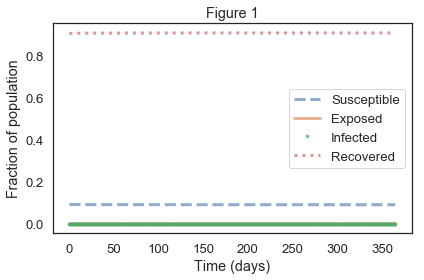

In [47]:
plot_results(results.S, results.E, results.I, results.R)
decorate(title ='Figure 1')

The result shows that even though measles is a highly contagious disease, the measles outbreak ends without infecting number of people due high immunity rate. We call this herd immunity, because immunized people acts as a barrier that prevents disease to spread among the susceptible people. For each disease, there is specific percentage of people needed to create a herd immunity. Lowering the immunity rate will show abrupt change in infected people, once the herd immunity stops working. 

In [48]:
init_im2 = 0.3
system = make_system(pop, init_im2, beta, gamma, sigma)
results2 = run_simulation(system, update_func)
results2;

Next, the code was tested with lowered initial immunity rate of 30%.

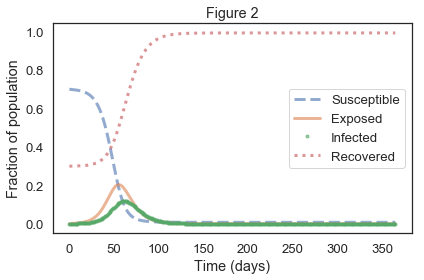

In [49]:
plot_results(results2.S, results2.E, results2.I, results2.R)
decorate (title = 'Figure 2')

The result is a lot different from the one above, showing that most of susceptible people become infected before the outbreak ends. This shows that the community with only 30% immunity rate has lost their herd immunity, because the number of immuned (recovered) people is too small to act as a barrier that protects the susceptible people. Seeing the result, we can assume that there must be a point between immunity rate of 30% to 90% where the herd immunity fails to function. 

In [50]:
def calc_highest_infected(results):
    """Fraction of population infected during the simulation.
    
    results: DataFrame with columns S, E, I, R
    
    returns: fraction of population
    """
    return max(results.I)

In [51]:
def sweep_init_im(imun_rate_array):
    """Sweep a range of values for beta.
    
    beta_array: array of beta values
    gamma: recovery rate
    
    returns: SweepSeries that maps from beta to total infected
    """
    sweep = SweepSeries()
    for init_im in imun_rate_array:
        system = make_system(pop, init_im, beta, gamma, sigma)
        results = run_simulation(system, update_func)
        sweep[system.init_im] = calc_highest_infected(results)*pop
    return sweep

To carefully check out the impact due to the change of initial immunity for the community, a sweep_init_im function was created. The function checks out the highest number of people infected to the disease during the simulation. Since the number of people being infected at a day is proportional to the number of currently infected people, higher numbers means that the disease is spreading faster. 

In [52]:
imun_rate_array = linspace(0, 1, 21)
sweep = sweep_init_im(imun_rate_array) 
sweep

,values
0.00,208.313630
0.05,193.245208
0.10,177.918762
0.15,162.651083
0.20,147.602195
0.25,132.761627
0.30,117.985077
0.35,103.523808
0.40,89.378869
0.45,75.521163


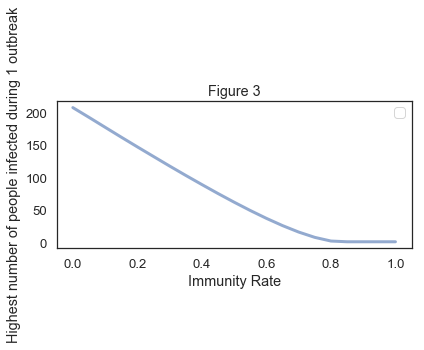

In [53]:
plot(sweep)
decorate(xlabel='Immunity Rate',
        ylabel = 'Highest number of people infected during 1 outbreak',
        title = 'Figure 3')

Looking at the table and the plot, we can examine that the speed of infection decreases almost linearly until the immunity rate reachs 80%. Actually, the table states that the maximum number of people infected after the initial immunization rate of 85% is 1, meaning that no one except for the initially infected person was infected during the outbreak. We guessed that the herd immunity for measles in this simulation must be around 80~85% range. 

In [54]:
def calc_fraction_infected(results):
    """Fraction of susceptible population infected during the simulation.
    
    results: DataFrame with columns S, E, I, R
    
    returns: fraction of susceptible group population
    """

    return (get_first_value(results.S) - get_last_value(results.S))/get_first_value(results.S)

In [55]:
def sweep_init_im2(imun_rate_array):
    """Sweep a range of values for beta.
    
    beta_array: array of beta values
    gamma: recovery rate
    
    returns: SweepSeries that maps from beta to total infected
    """
    sweep = SweepSeries()
    for init_im in imun_rate_array:
        system = make_system(pop, init_im, beta, gamma, sigma)
        results = run_simulation(system, update_func)
        sweep[system.init_im] = calc_fraction_infected(results) * 100 
    return sweep

To do a deeper analysis, another sweep_init_im function was created to check out the percentage of people in the susceptible group infected during the outbreak. It will give us more clear view toward the herd immunity for measles and hopefully reveal the danger of lowering immunity rate for a community.

In [56]:
imun_rate_array = linspace(0, 0.99, 34)
sweep2 = sweep_init_im2(imun_rate_array) 
sweep2

,values
0.00,99.880178
0.03,99.851143
0.06,99.813900
0.09,99.767596
0.12,99.710066
0.15,99.638624
0.18,99.549939
0.21,99.439865
0.24,99.303238
0.27,99.133598


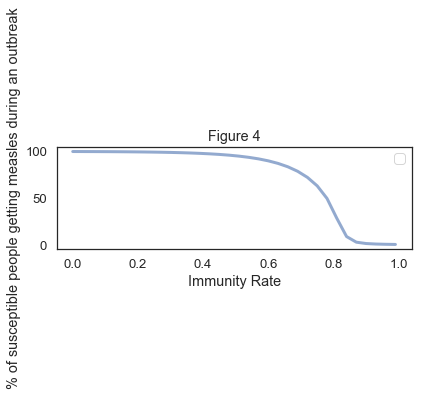

In [57]:
plot(sweep2)
decorate(xlabel='Immunity Rate',
        ylabel = '% of susceptible people getting measles during an outbreak',
        title = 'Figure 4')

Until the immunity rate reaches 60%, more than 90% of people in the susceptible group is infected by the measles. However, the percentage drops abruptly after that, hitting less than 10% on immunity rate of 84%. This graph clearly shows the importance of herd immunity, and the threat people can face due to the lowering of the immunity rate. 

## Results

This model uses SEIR methodology to examine how measels would spread throughout a community of 1000 individuals with varying immunity rates. Figure 1 depicts an SEIR representation based on a 90.7% measles immunity rate, equivalent to that of the immunity rate in the United States. Due to the high immunity rate, susceptible people are protected by the herd immunity, and the number of individuals in each of the categories, susceptible, recovered, and infected remains constant throughout the simulated outbreak.

Figure 2 represents an example of the SEIR model with an immunity rate of 30%. In this model, we can see that as the number of susceptible individuals decreases, the number of recovered individuals increases at an equal and opposite rate. The entire population get infected and later recovered from this measles outbreak within 150 days of the start.

Figure 3 depicts the predicted outcome of this model that as the immunity rate in a community increases, rate of infection decreases, thus the number of people infected during an outbreak will decrease. We see the number of infected individuals plateau around 80%~85% immunity.

Figure 4 depicts the percent of susceptible individuals that do contact measles during an outbreak. At low immunity rates (without herd immunity) a large percent of susceptible individuals do contact measles. As the immunity rate increases, this percentage decreases.

## Interpretation

As expected, as the immunity rate in the community increased, the highest number of people infected with measles during an outbreak decreased. The number of people infected with measles begins to plateau between an 80 - 85% immunity rate. From the data that Figure 4 is based on we can see that the ideal immunity rate for a community should be more than 80 - 85%, because the herd immunity is lost at the lowered immunity rate. Between these 2 numbers, the percent of susceptible individuals that contract measles drops sharply from 36% to 6%. 

Our model does have several limitations:
1. We were unable to find an effective contact number or contact rate for measles within the United States. Having this number would have enabled us to calculate beta instead of just assuming it to be 0.9.

2. The model gets to a point where less than 1 person is infected with measles. This is physically impossible as you cannot have less than one person. In our results, we interpreted less than 1 to mean the individual did not have measles. 

3. The outbreak usually happens country wide, not restricted into a single community. Due to the fact that the simulation was done in a close community, the results may vary in real world situation. 

4. People who get measles are usually quarantined before they start infecting other people. One special feature about measles is the rash, which usuaully appears 14 days after exposure. In real world, people get quarantined right away when they get the rash. In this simulation, the factor was ignored. People can also get a MMR vaccination while they are exposed, meaning that not every exposed people move to the infected stage. 

5. Measles spread differently among different age groups. Usually, it spread easily among the younger children. The age factor was ignored in this simulation due to its complexity. 

## Abstract

In this model, we were seeking to find out the result of lowering the measles immunity rate in a small community during a outbreak. As predicted, we found that as the immunity rate in a community is lowered, the number of infections in a community increases. We also found that when immunity is between 80-85%, the number of individuals infected in a population begins to plateau. This finding indicated that the ideal immunity rate for a community of 1000 individuals is between 80-85%.


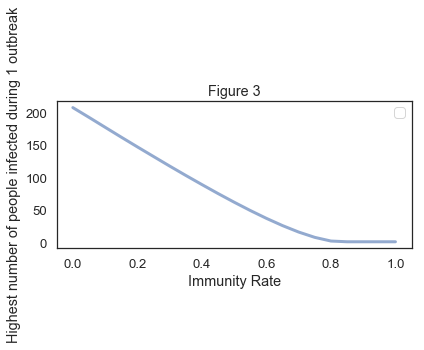

In [58]:
plot(sweep)
decorate(xlabel='Immunity Rate',
        ylabel = 'Highest number of people infected during 1 outbreak',
        title = 'Figure 3')

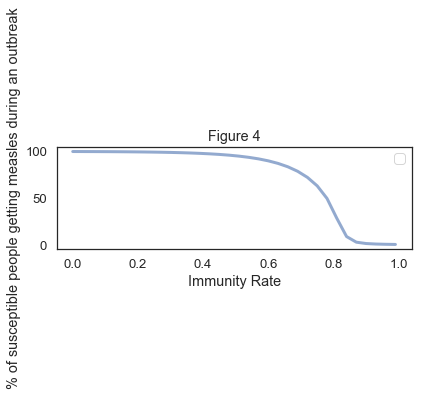

In [59]:
plot(sweep2)
decorate(xlabel='Immunity Rate',
        ylabel = '% of susceptible people getting measles during an outbreak',
        title = 'Figure 4')